<a href="https://colab.research.google.com/github/Jokiba/ml-product-reviews-project/blob/main/notebooks/product_reviews_analysis_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product reviews analysis
**Team**: ITAcademy<br>

## Clean dataset

*   Clean missing values

*   Convert product price to float

*   Standardization sentiment values


In [1]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/Jokiba/ml-product-reviews-project/main/data/product_reviews_full.csv"
df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (171380, 6)

First 5 rows:


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [2]:
# Count the number of rows before removing missing values
rows_before = len(df)

# Filter out rows that contain at least one missing value
rows_with_nan = df[df.isnull().any(axis=1)]

# Display a random sample of rows that will be removed
print(" Randomly selected rows containing missing values:\n")
print(rows_with_nan.sample(n=min(5, len(rows_with_nan)), random_state=42))

# Remove rows with any missing values
df_cleaned = df.dropna()

# Count the number of rows after removing missing values
rows_after = len(df_cleaned)

# Show removal statistics
print("\n Removal statistics:")
print(f"- Number of rows before: {rows_before}")
print(f"- Number of rows after: {rows_after}")
print(f"- Number of removed rows: {rows_before - rows_after}")

 Randomly selected rows containing missing values:

                                 review_uuid  \
138622  be155fca-c19b-4ca5-8a11-dcda5f334e18   
48332   0fcacd59-eb69-4c73-adb7-8bdd6c86cdbd   
10021   772ca541-7296-4065-b969-2eaef308623a   
9637    05b646fc-66a0-4d3b-a97a-ccb6b367eaa2   
156343  3a97cd00-5eea-4533-889c-c3ed7eedda36   

                                             product_name product_price  \
138622  SAMSUNG 253 L Frost Free Double Door 3 Star Re...      $295.06    
48332   Men Solid Single Breasted Casual Blazer??????(...       $38.54    
10021   CEAT Hitman Full Size Double Blade Poplar Cric...          3.96   
9637    Hindware Ripple 90 Auto Clean Wall Mounted Chi...        172.28   
156343  APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with ...      $361.33    

                  review_title                            review_text  \
138622               Very Good  good design and effective performance   
48332                      Nan                                

In [3]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())


New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


In [4]:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)

# Step 2: Convert cleaned string to float
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors='coerce')

# Step 3: Drop the temporary column
df = df.drop(columns=['product_price_cleaned'])

# Step 4: Drop any rows where conversion failed (still NaN)
df = df.dropna(subset=['product_price'])

# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())

Column type after parsing: float64

Price summary:
count    165960.000000
mean         65.786896
std         135.944167
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


In [5]:
# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()

# Step 2: Show all unique values in the sentiment column
print("Unique sentiment values after cleaning:")
print(df['sentiment'].value_counts())

# Step 3: Convert column type to 'category'
df['sentiment'] = df['sentiment'].astype('category')
print("\nSentiment column converted to type:", df['sentiment'].dtype)


Unique sentiment values after cleaning:
sentiment
positive    107619
negative     44663
neutral      13678
Name: count, dtype: int64

Sentiment column converted to type: category


In [6]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['review_uuid', 'product_name'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['product_price', 'review_title', 'review_text', 'sentiment']


Price summary by sentiment:
              count       mean         std   min   25%    50%     75%      max
sentiment                                                                     
negative    44663.0  59.655028  112.306009  0.71  4.35  18.06  60.710  1566.14
neutral     13678.0  55.532342  107.524238  0.71  3.30  10.23  59.845  1204.70
positive   107619.0  69.635003  147.485845  0.18  4.20  14.08  66.250  1048.07


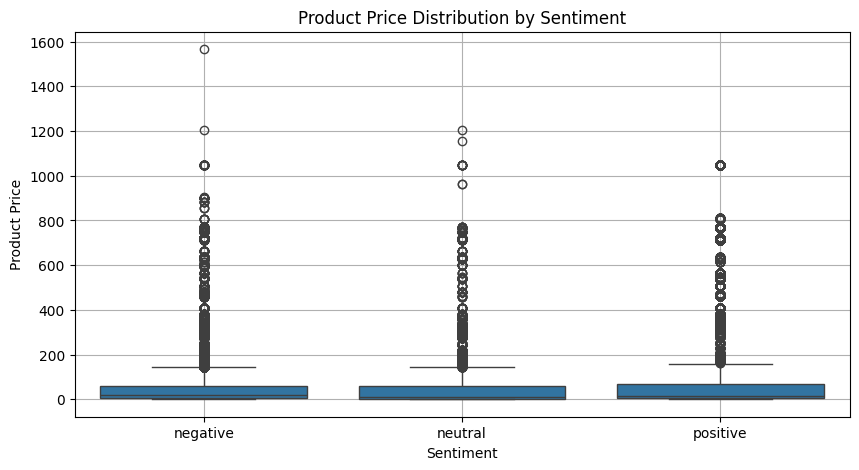

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show summary statistics grouped by sentiment
print("Price summary by sentiment:")
print(df.groupby('sentiment', observed=False)['product_price'].describe())

# Boxplot of prices by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='product_price')
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Product Price")
plt.grid(True)
plt.show()

Review length summary:
count    165960.000000
mean         48.378435
std          76.611087
min           1.000000
25%           9.000000
50%          19.000000
75%          50.000000
max         523.000000
Name: review_length, dtype: float64
Review length statistics by sentiment:
              count       mean        std  min   25%   50%   75%    max
sentiment                                                              
negative    44663.0  60.900701  78.376363  1.0  16.0  32.0  71.0  523.0
neutral     13678.0  41.418190  64.707990  1.0   7.0  19.0  47.0  500.0
positive   107619.0  44.066187  76.679684  1.0   8.0  15.0  41.0  497.0


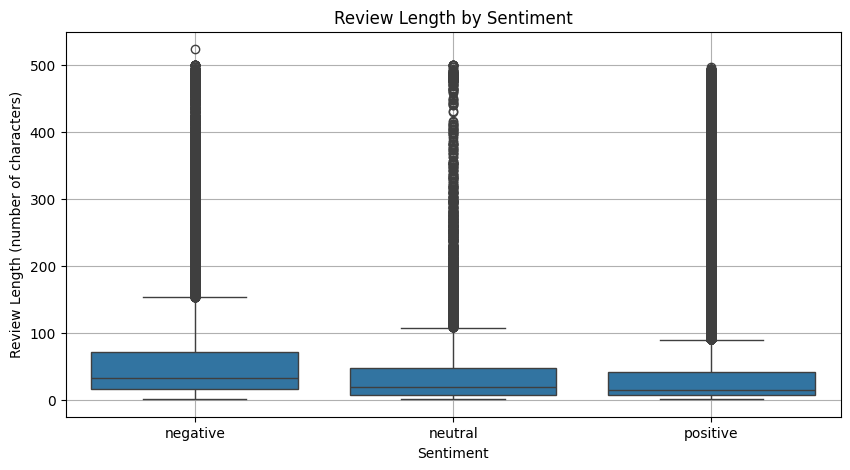

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new column with length of each review_text
df['review_length'] = df['review_text'].astype(str).str.len()

# Show basic stats
print("Review length summary:")
print(df['review_length'].describe())

# Group by sentiment and describe review length
print("Review length statistics by sentiment:")
print(df.groupby('sentiment', observed=False)['review_length'].describe())

# Visualize distribution of review length by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (number of characters)")
plt.grid(True)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Features and label
X = df[["review_title", "review_text", "review_length"]]
y = df["sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=32, stratify=y
)

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


# Preprocessor: TF-IDF for text, MinMaxScaler for numeric feature
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "review_title"),
        ("text", TfidfVectorizer(), "review_text"),
        ("length", MinMaxScaler(), ["review_length"])
    ]
)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

# Train and evaluate
for name, model in models.items():
    print(f"{"-" * 40}")
    print(f"\n{name}:")
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))

----------------------------------------

Logistic Regression:
              precision    recall  f1-score   support

    negative       0.88      0.93      0.90      8932
     neutral       0.72      0.51      0.60      2736
    positive       0.96      0.97      0.97     21524

    accuracy                           0.92     33192
   macro avg       0.85      0.80      0.82     33192
weighted avg       0.92      0.92      0.92     33192

----------------------------------------

Naive Bayes:
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      8932
     neutral       0.81      0.26      0.40      2736
    positive       0.92      0.98      0.95     21524

    accuracy                           0.89     33192
   macro avg       0.86      0.71      0.74     33192
weighted avg       0.89      0.89      0.88     33192

----------------------------------------

Decision Tree:
              precision    recall  f1-score   support

    nega